<a href="https://colab.research.google.com/github/VenuGopal1899/Deep-Learning-Projects/blob/main/Second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_object = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history_object.history
print(history_dict.keys())

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5957 - accuracy: 0.7015 - val_loss: 0.3968 - val_accuracy: 0.8728
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3389 - accuracy: 0.8997 - val_loss: 0.3138 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2378 - accuracy: 0.9294 - val_loss: 0.3001 - val_accuracy: 0.8813
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1926 - accuracy: 0.9372 - val_loss: 0.2912 - val_accuracy: 0.8832
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1498 - accuracy: 0.9560 - val_loss: 0.2797 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1199 - accuracy: 0.9671 - val_loss: 0.3081 - val_accuracy: 0.8782
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1007 - accuracy: 0.9705 - val_loss: 0.3105 - val_accuracy: 0.8798
Epoch 8/20
30

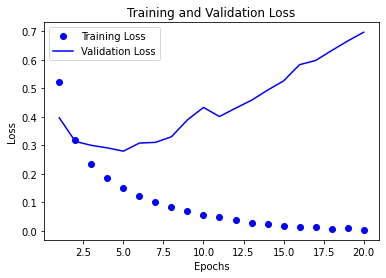

In [ ]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
accuracy = history_dict['accuracy']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(accuracy)+1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

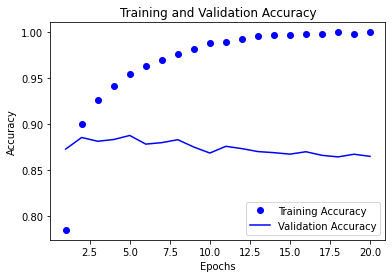

In [ ]:
import matplotlib.pyplot as plt

acc_values = history_dict['accuracy']
accuracy = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(accuracy)+1)

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Kind of Naive approach based on graph - Accuracy 88% 

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=4, batch_size=512)

results = model2.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 24ms/step - loss: 0.5391 - accuracy: 0.7508
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2702 - accuracy: 0.9092
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.1996 - accuracy: 0.9325
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2946 - accuracy: 0.8837
[0.2945576310157776, 0.883679986000061]


A higher degree of accuracy can be achieved by using a better training algorithm. (Upto 95%)

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(32, activation='relu', input_shape=(10000, )))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=4, batch_size=512)

results = model3.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.5247 - accuracy: 0.7606
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2476 - accuracy: 0.9130
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.1947 - accuracy: 0.9306
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3537 - accuracy: 0.8635
[0.35369953513145447, 0.8634799718856812]
